# Day 11
batch size 256 lr 1e-3, normed weighted, non-rotated, cartesian, SWA test

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [3]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
classModel = 'modelSwish'
varSet = "basic_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [5]:
with open(dirLoc + 'inputPipe.pkl', 'rb') as fin:
    inputPipe = pickle.load(fin)

In [6]:
trainData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'train.hdf5', "r+"),
                                    inputPipe=inputPipe, augRotMult=16)

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 0.693s 


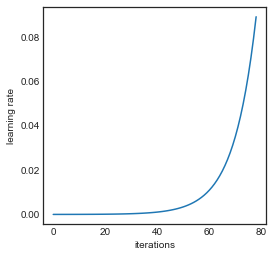

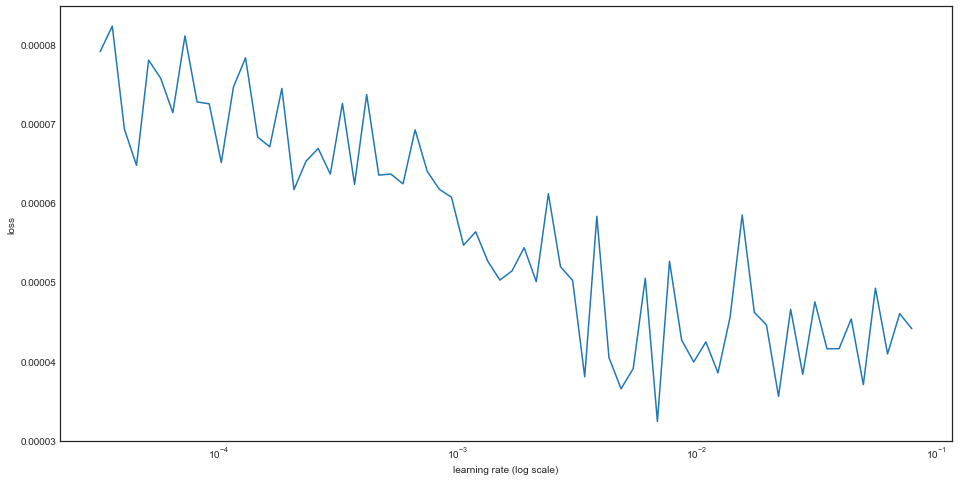

______________________________________



In [8]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [11]:
compileArgs['lr'] = 5e-4

## Train classifier

Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 4.229560272128784e-05
2 New best found: 3.839892536339306e-05
3 New best found: 3.7483156966530695e-05
4 New best found: 3.635280430721477e-05
5 New best found: 3.633976691697736e-05
6 New best found: 3.538004593574908e-05
7 New best found: 3.508710267649904e-05
9 New best found: 3.493303756868043e-05
10 New best found: 3.45372929574433e-05
11 New best found: 3.415820441091756e-05
15 New best found: 3.394137770885874e-05
18 New best found: 3.3768262664377776e-05
19 New best found: 3.360074622047835e-05
20 New best found: 3.350813624358921e-05
21 New best found: 3.340634032471696e-05
25 New best found: 3.317571654346924e-05
29 New best found: 3.313486390001604e-05
30 New best found: 3.311685521369405e-05
31 New best found: 3.309949936654325e-05
32 New best found: 3.285331183258809e-05
36 New best found: 3.283912442861241e-05
42 New best found: 3.277763430607818e-05
43 New best found: 3.

68 New best found: 3.271710522531066e-05
74 New best found: 3.270128547446802e-05
85 New best found: 3.264825050137006e-05
89 New best found: 3.25728594645625e-05
90 New best found: 3.257165680843172e-05
91 New best found: 3.2564836433448364e-05
94 New best found: 3.2524321242817675e-05
104 New best found: 3.244012133072829e-05
114 New best found: 3.241916566330474e-05
117 New best found: 3.2417003437876704e-05
122 New best found: 3.24151158623863e-05
126 New best found: 3.239840358000947e-05
127 New best found: 3.23579409494414e-05
131 New best found: 3.229718536022119e-05
143 New best found: 3.2237041647022124e-05
152 New best found: 3.221492595184827e-05
164 New best found: 3.221141478570644e-05
179 New best found: 3.2106088266300506e-05
206 New best found: 3.20614577649394e-05
224 New best found: 3.201726447441615e-05
231 New best found: 3.198694590682862e-05
263 New best found: 3.19446504174266e-05
305 New best found: 3.186081831518095e-05
324 New best found: 3.1772522718529214e-0

116 New best found: 3.159020088020004e-05
123 New best found: 3.1565947998518194e-05
133 New best found: 3.153604697474033e-05
136 New best found: 3.144160528420825e-05
157 New best found: 3.126301629981485e-05
Early stopping after 207 epochs
Score is: {'loss': 3.126301629981485e-05, 'wAUC': 0.06189776314075501, 'AUC': 0.09889676049636409}
Fold took 200.793s

Running fold 9 / 10
1 New best found: 4.298322896793477e-05
2 New best found: 3.945700017004511e-05
3 New best found: 3.7718728612012176e-05
4 New best found: 3.664220850406844e-05
5 New best found: 3.639581280564844e-05
6 New best found: 3.625971558662547e-05
7 New best found: 3.5603459010197674e-05
9 New best found: 3.4829183875201884e-05
11 New best found: 3.461230159364578e-05
12 New best found: 3.451231738519102e-05
13 New best found: 3.436899181952597e-05
15 New best found: 3.417217938497653e-05
16 New best found: 3.408487007813993e-05
17 New best found: 3.400439385943373e-05
18 New best found: 3.3740626357257875e-05
19 New 

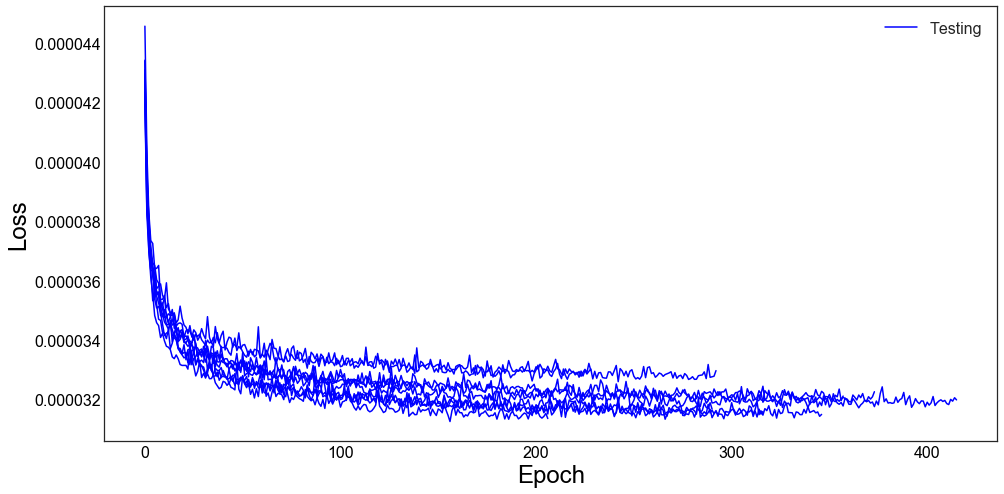

Mean loss = 3.19e-05 +- 2e-07
Mean wAUC = 0.0642 +- 0.0007
Mean AUC = 0.1005 +- 0.0009
______________________________________



In [12]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, modelParams, trainParams, swaStart=-1,
                                          patience=50, cosAnnealMult=0, reduxDecay=False, trainOnWeights=True,
                                          maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [5]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [6]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 1 with loss = 3.081834277645131e-05
Model 1 is 5 with loss = 3.0872881186835534e-05
Model 2 is 7 with loss = 3.1133123032824354e-05
Model 3 is 0 with loss = 3.124075680919089e-05
Model 4 is 4 with loss = 3.1504365232901894e-05
Model 5 is 2 with loss = 3.179996855352909e-05
Model 6 is 6 with loss = 3.2064552728697566e-05
Model 7 is 8 with loss = 3.231228751051368e-05
Model 8 is 3 with loss = 3.2595311997671726e-05
Model 9 is 9 with loss = 3.3109084638750596e-05


## Response on validation data base

In [9]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [10]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=0)

In [11]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source)))

Testing ROC AUC: unweighted 0.902130162544, weighted 0.935563415312


In [12]:
amsScanQuick(convertToDF(valData.source))

50000 candidates loaded
3.871075357519875 0.9559333


(3.871075357519875, 0.9559333)

## Response on validation data merged

In [51]:
merged = getModel(**modelParams)

In [52]:
mergedParams = merged.get_weights()
for param in mergedParams:
    param.fill(0)

In [53]:
for model, weight in zip(ensemble, weights):
    for param, modParam in zip(mergedParams, model.get_weights()):
        param += modParam

In [54]:
for param in mergedParams:
    param /= 10

In [55]:
merged.set_weights(mergedParams)

In [56]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [57]:
batchEnsemblePredict([merged], np.array([1]), valData, ensembleSize=1, verbose=0)

In [58]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source)))

Testing ROC AUC: unweighted 0.483388859656, weighted 0.595265045494


In [59]:
amsScanQuick(convertToDF(valData.source))

50000 candidates loaded
1.0867271622808339 0.48827246


(1.0867271622808339, 0.48827246)